In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_online_retail = pd.read_excel('Online Retail.xlsx')
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
print("Shape:", df_online_retail.shape)

Shape: (541909, 8)


In [6]:
# Info geral
df_online_retail.info()
df_online_retail.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
# Verificar colunas
print("Columns:", df_online_retail.columns)

Columns: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [15]:
#Verificar e contar valores ausentes, negativos e duplicados no dataset

print("Missing CustomerID:", df_online_retail['CustomerID'].isna().sum())
print("Negative quantities:", (df_online_retail['Quantity'] < 0).sum())
print("UnitPrice <= 0:", (df_online_retail['UnitPrice'] <= 0).sum())
print("Duplicated rows:", df_online_retail.duplicated().sum())

Missing CustomerID: 135080
Negative quantities: 10624
UnitPrice <= 0: 2517
Duplicated rows: 5268


In [16]:
# Remover valores em falta (NaN) e duplicados nas colunas CustomerID e Country

df_online_retail[['CustomerID','Country']].dropna().drop_duplicates().head(10)


,CustomerID,Country
0,17850.0,United Kingdom
9,13047.0,United Kingdom
26,12583.0,France
46,13748.0,United Kingdom
65,15100.0,United Kingdom
82,15291.0,United Kingdom
86,14688.0,United Kingdom
105,17809.0,United Kingdom
106,15311.0,United Kingdom
141,14527.0,United Kingdom


In [17]:
#Limpeza básica

# Remover linhas sem CustomerID (não conseguimos identificar o cliente)
df_online_retail = df_online_retail.dropna(subset=['CustomerID'])

# Remover quantidades <= 0 (returns ou erros)
df_online_retail = df_online_retail[df_online_retail['Quantity'] > 0]

# Remover preços <= 0
df_online_retail = df_online_retail[df_online_retail['UnitPrice'] > 0]

# Converter InvoiceDate para datetime
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'], errors='coerce')

# Remover duplicados
df_online_retail = df_online_retail.drop_duplicates()

#Alterar NaN para 0
df_online_retail = df_online_retail.fillna(0)

# Criar OrderValue - Saber quanto gastou cada cliente em cada fatura
df_online_retail['OrderValue'] = df_online_retail['Quantity'] * df_online_retail['UnitPrice']


# Criar Fact_Orders // Selecionar colunas que interessam para analisar faturas/clientes

fact_orders = df_online_retail[['InvoiceNo','InvoiceDate','CustomerID','StockCode','Description','Quantity','UnitPrice','OrderValue','Country']].copy()

# Renomear colunas
fact_orders = fact_orders.rename(columns={
    'InvoiceNo': 'order_id',
    'InvoiceDate': 'order_date',
    'CustomerID': 'customer_id',
    'StockCode': 'product_id',
    'Quantity': 'quantity',
    'UnitPrice': 'unit_price',
    'OrderValue': 'order_value',
    'Country': 'country'
})

# Guardar em CSV
fact_orders.to_csv("fact_orders.csv", index=False)

print("Fact_Orders criado com shape:", fact_orders.shape)
fact_orders.head()

/tmp/ipython-input-4189191302.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_online_retail = df_online_retail.fillna(0)


Fact_Orders criado com shape: (392692, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [37]:
#Dim Customers - Criação de df para analisar Clientes
dim_customers = fact_orders.groupby('customer_id').agg(
    first_purchase=('order_date','min'),
    last_purchase=('order_date','max'),
    total_spent=('order_value','sum'),
    num_orders=('order_id','nunique'),
    country=('country','first')
).reset_index()

# Calcular LTV (já é o total_spent)
dim_customers['ltv'] = dim_customers['total_spent']

# Calcular recency (dias desde última compra até à data mais recente do dataset)
snapshot_date = fact_orders['order_date'].max() + pd.Timedelta(days=1)
dim_customers['recency_days'] = (snapshot_date - pd.to_datetime(dim_customers['last_purchase'])).dt.days

# Flag de churn (exemplo: sem compra há > 180 dias) - 1=Inativo; 0=Ativo
dim_customers['churn_flag'] = (dim_customers['recency_days'] > 180).astype(int)


# Dim_Products - Criação de df para analisar produtos

dim_products = fact_orders.groupby('product_id').agg(
    price=('unit_price','first'),
    mean_price=('unit_price','mean'),
    total_revenue=('order_value','sum'),
    num_orders=('order_id','nunique'),
    num_customers=('customer_id','nunique')
).reset_index()

# Guardar dimensões
dim_customers.to_csv("dim_customers.csv", index=False)
dim_products.to_csv("dim_products.csv", index=False)

print("Dim tables criadas:")
print("dim_customers:", dim_customers.shape)
print("dim_products:", dim_products.shape)


Dim tables criadas:
dim_customers: (4338, 9)
dim_products: (3665, 6)


,product_id,price,mean_price,total_revenue,num_orders,num_customers
0,10002,0.850,0.850000,699.550,49,40
1,10080,0.850,0.411905,114.410,21,19
2,10120,0.210,0.210000,40.320,29,25
3,10125,0.850,0.781746,929.450,61,49
4,10133,0.850,0.529262,1138.990,122,101
...,...,...,...,...,...,...
3660,C2,50.000,50.135338,6686.000,133,29
3661,DOT,11.170,744.147500,11906.360,16,1
3662,M,1.250,178.406129,53419.930,253,197
3663,PADS,0.001,0.001000,0.003,3,3


In [58]:
# Criação de colunas da data do Pedido e do Primeiro Pedido do Cliente
fact_orders['order_month'] = fact_orders['order_date'].dt.to_period('M')
fact_orders['cohort_month'] = fact_orders.groupby('customer_id')['order_date'] \
                                         .transform('min').dt.to_period('M')

# Contagem de clientes únicos por cohort e mês
cohort_data = fact_orders.groupby(['cohort_month','order_month']) \
                         .agg(n_customers=('customer_id','nunique')) \
                         .reset_index()

# Tamanho inicial de cada cohort (nº de clientes no mês da primeira compra)
cohort_sizes = cohort_data[cohort_data['cohort_month'] == cohort_data['order_month']] \
                           .set_index('cohort_month')['n_customers']

# Pivot table de cohort
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='order_month', values='n_customers')

# Dividir cada linha pelo cohort_size correspondente
retention = cohort_pivot.divide(cohort_sizes, axis=0)


retention = retention.round(2)
retention.head(10)



order_month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
cohort_month,,,,,,,,,,,,,
2010-12,1.0,0.37,0.32,0.38,0.36,0.40,0.36,0.35,0.35,0.40,0.37,0.50,0.27
2011-01,NaN,1.00,0.22,0.27,0.23,0.32,0.29,0.25,0.24,0.30,0.33,0.36,0.12
2011-02,NaN,NaN,1.00,0.19,0.19,0.28,0.27,0.25,0.25,0.28,0.25,0.31,0.07
2011-03,NaN,NaN,NaN,1.00,0.15,0.25,0.20,0.22,0.17,0.27,0.23,0.28,0.09
2011-04,NaN,NaN,NaN,NaN,1.00,0.21,0.20,0.21,0.20,0.23,0.22,0.26,0.07
2011-05,NaN,NaN,NaN,NaN,NaN,1.00,0.19,0.17,0.17,0.21,0.23,0.26,0.10
2011-06,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.17,0.16,0.26,0.23,0.33,0.10
2011-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.18,0.21,0.22,0.27,0.11
2011-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.25,0.24,0.12


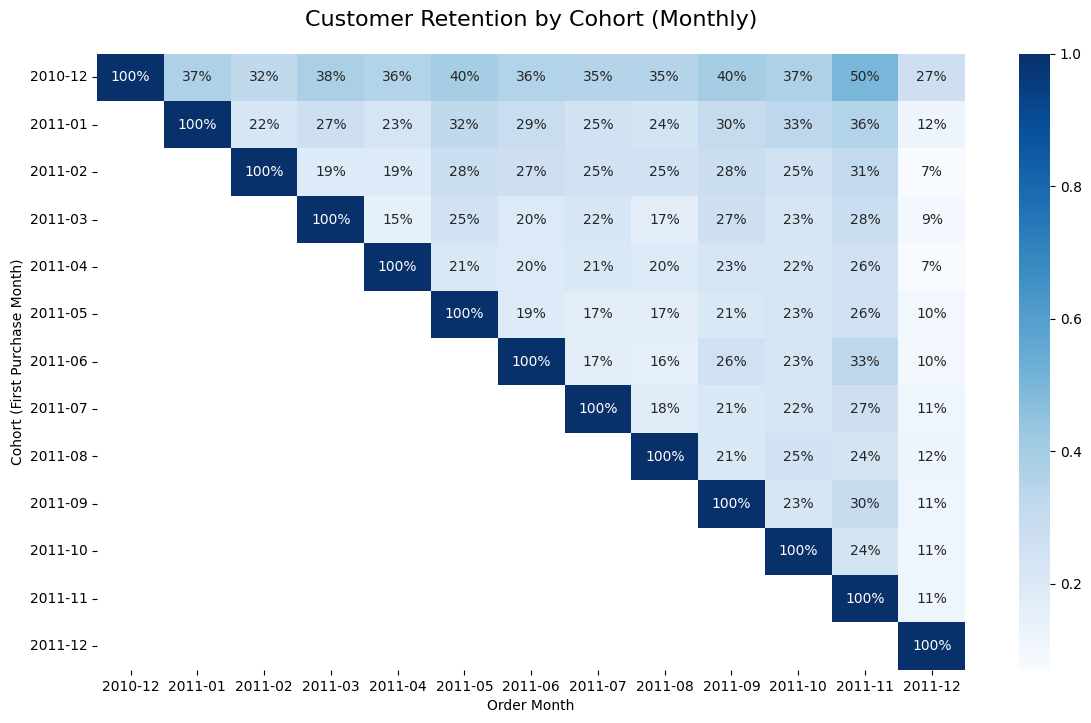

In [59]:
# Heatmap de retention
plt.figure(figsize=(14, 8))
sns.heatmap(retention,
            annot=True, fmt=".0%", cmap="Blues", cbar=True)

plt.title("Customer Retention by Cohort (Monthly)", fontsize=16, pad=20)
plt.xlabel("Order Month")
plt.ylabel("Cohort (First Purchase Month)")
plt.yticks(rotation=0)
plt.show()


/tmp/ipython-input-1691506635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='product_id', data=top_products, palette="viridis")


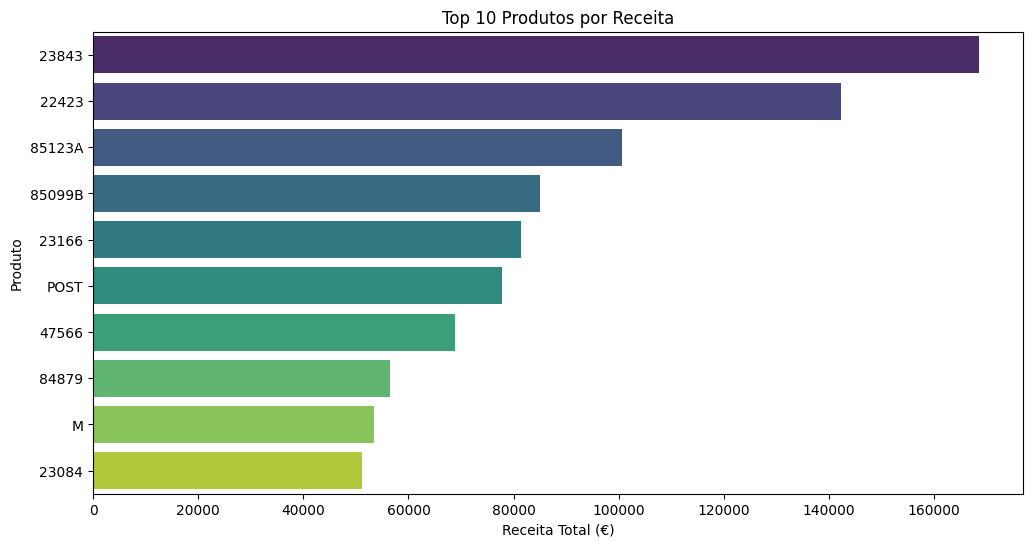

In [60]:
#Top 10 produtos por receita

top_products = dim_products.sort_values('total_revenue', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='total_revenue', y='product_id', data=top_products, palette="viridis")
plt.title("Top 10 Produtos por Receita")
plt.xlabel("Receita Total (€)")
plt.ylabel("Produto")
plt.show()



/tmp/ipython-input-363498850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_country.values, y=churn_by_country.index, palette="magma")


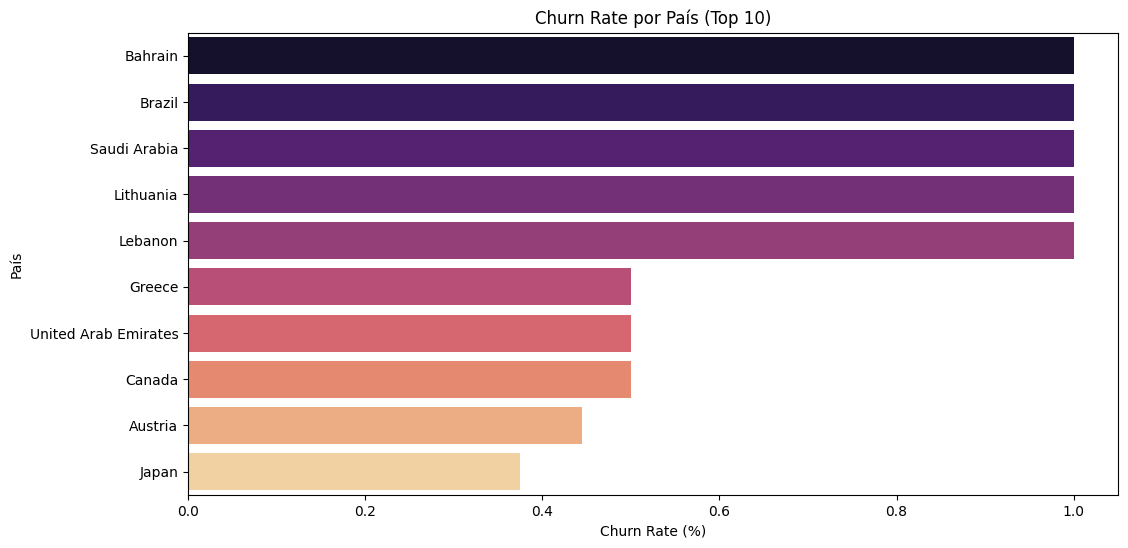

In [45]:
#Churn Rate por país

churn_by_country = dim_customers.groupby('country')['churn_flag'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=churn_by_country.values, y=churn_by_country.index, palette="magma")
plt.title("Churn Rate por País (Top 10)")
plt.xlabel("Churn Rate (%)")
plt.ylabel("País")
plt.show()


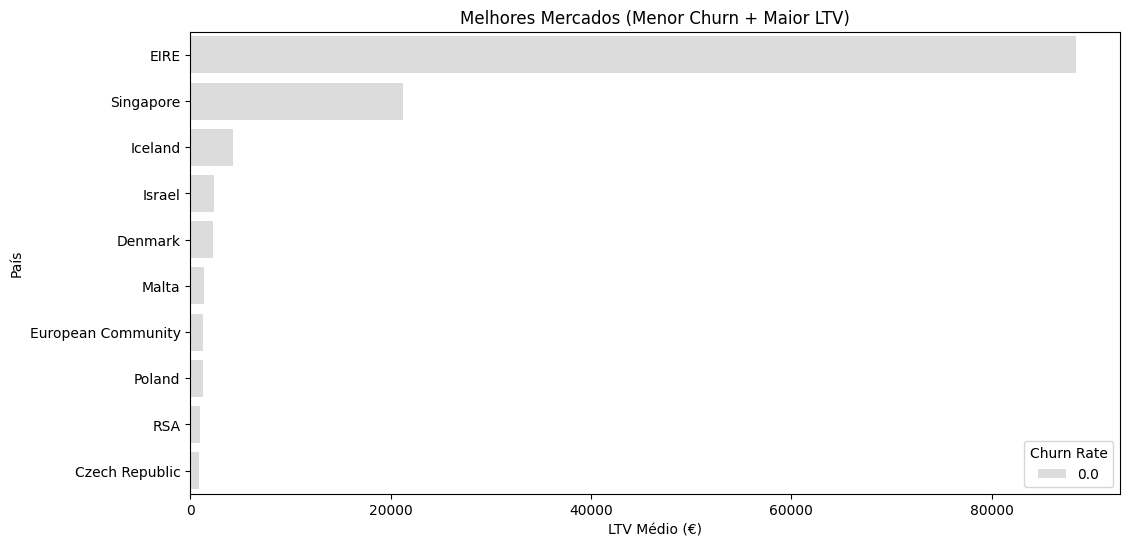

In [63]:
#Melhores Mercados

country_metrics = dim_customers.groupby('country').agg(
    churn_rate=('churn_flag', 'mean'),
    avg_ltv=('ltv', 'mean')
).reset_index()

# Ordenar pelos melhores (baixo churn + alto LTV)
best_markets = country_metrics.sort_values(['churn_rate','avg_ltv'], ascending=[True, False]).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='avg_ltv', y='country', hue='churn_rate', dodge=False, data=best_markets, palette="coolwarm")
plt.title("Melhores Mercados (Menor Churn + Maior LTV)")
plt.xlabel("LTV Médio (€)")
plt.ylabel("País")
plt.legend(title="Churn Rate")
plt.show()
